In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 선형회귀분석 모델
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가 함수
from sklearn.metrics import r2_score
# 선형 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# 한글 폰트 설정 (mac용)
matplotlib.rc("axes", unicode_minus=False)
matplotlib.rcParams["font.family"] = 'AppleGothic'

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)


# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'



# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic')
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import platform

# [1] 한글 폰트 설정 (운영체제별로 처리)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'    # macOS
else:
    plt.rcParams['font.family'] = 'NanumGothic'     # Linux

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# 기본 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 깨짐 방지 (Macdf["OrderDT"] = pd.to_datetime(df["OrderDT"])

#import matplotlib
#matplotlib.rc('font', family='AppleGothic')
#plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
df = pd.read_csv('/content/df_clean (2).csv', parse_dates=['OrderDT', 'DeliveryDT'])

# 확인
print("✅ 데이터 shape:", df.shape)
print("✅ 컬럼 목록:\n", df.columns)
df.head()


✅ 데이터 shape: (856727, 32)
✅ 컬럼 목록:
 Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')


,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,DeliveryDT,Deli_Year,Deli_Month,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Duration,Deli_Hours,IsMorningDelivery
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,1,13,...,2022-01-14 06:28:00,2022,1,14,6,28,0,0 days 13:38:00,13.633333,1


# 월 단위 추출
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # Period 타입

# 월별 매출 합계
monthly_sales = df.groupby('OrderMonth')['Price'].sum()

# 시각화
plt.figure(figsize=(15, 5))
monthly_sales.plot(marker='o')
plt.title('📈 월별 매출 추이')
plt.xlabel('주문월')
plt.ylabel('매출 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()


## 시간대별 매출패턴

## 요일별 매출 비교 (2030 vs 4060)

In [3]:
df_unique = df.drop_duplicates(subset=['idUser', 'OrderDT'])

print(df_unique)

#df = df_unique

        idUser Gender  Age AgeGroup  FamilyCount MemberYN            idOrder  \
0       U10001     여성   26      20대            2        Y  U10001-O2022-1002   
4       U10001     여성   26      20대            2        Y  U10001-O2022-1003   
8       U10001     여성   26      20대            2        Y  U10001-O2022-1004   
12      U10001     여성   26      20대            2        Y  U10001-O2022-1005   
19      U10001     여성   26      20대            2        Y  U10001-O2022-1006   
...        ...    ...  ...      ...          ...      ...                ...   
856697  U13000     여성   30      30대            1        N  U13000-O2024-1013   
856701  U13000     여성   30      30대            1        N  U13000-O2024-1007   
856710  U13000     여성   30      30대            1        N  U13000-O2024-1014   
856714  U13000     여성   30      30대            1        N  U13000-O2024-1015   
856720  U13000     여성   30      30대            1        N  U13000-O2024-1008   

                   OrderDT  OrderMonth 

In [4]:
from datetime import datetime, timedelta

df_unique["OrderDT_date"] = pd.to_datetime(df_unique["OrderDT"])

def dateweek(x):

    return x.strftime("%Y:%m:%d:%H:%M:%S")

df_unique["OrderDT_Formatted"] = df_unique["OrderDT_date"].apply(dateweek)

print(df_unique["OrderDT_Formatted"])

print(df_unique["DeliveryDT"])

df_unique["DeliveryDT_date"] = pd.to_datetime(df_unique["DeliveryDT"])

df_unique["DeliveryDT_Formatted"] = df_unique["DeliveryDT_date"].apply(dateweek)

print(df_unique["DeliveryDT_Formatted"])

#print(df_unique["OrderDT_Formatted"][2])

#t1 = datetime.strptime(df["OrderDT_Formatted"][2], "%Y:%m:%d:%H:%M:%S")
#t2 = datetime.strptime(df["DeliveryDT_Formatted"][2], "%Y:%m:%d:%H:%M:%S")

#print(t1, t2)
#print(t1[1], t1[3], t1[5])

# 시간 차이 계산
#delta = t2 - t1
#seconds = delta.total_seconds()

#print(delta)

0         2022:01:06:17:08:00
4         2022:01:13:16:50:00
8         2022:01:20:20:36:00
12        2022:01:27:21:07:00
19        2022:02:03:16:59:00
                 ...         
856697    2024:09:16:10:04:00
856701    2024:09:19:20:42:00
856710    2024:10:06:22:19:00
856714    2024:12:08:22:16:00
856720    2024:12:26:14:06:00
Name: OrderDT_Formatted, Length: 171679, dtype: object
0        2022-01-07 06:24:00
4        2022-01-14 06:28:00
8        2022-01-21 04:24:00
12       2022-01-29 06:41:00
19       2022-02-04 06:49:00
                 ...        
856697   2024-09-17 04:37:00
856701   2024-09-20 05:26:00
856710   2024-10-08 05:35:00
856714   2024-12-10 06:12:00
856720   2024-12-27 04:23:00
Name: DeliveryDT, Length: 171679, dtype: datetime64[ns]
0         2022:01:07:06:24:00
4         2022:01:14:06:28:00
8         2022:01:21:04:24:00
12        2022:01:29:06:41:00
19        2022:02:04:06:49:00
                 ...         
856697    2024:09:17:04:37:00
856701    2024:09:20:05:26:00


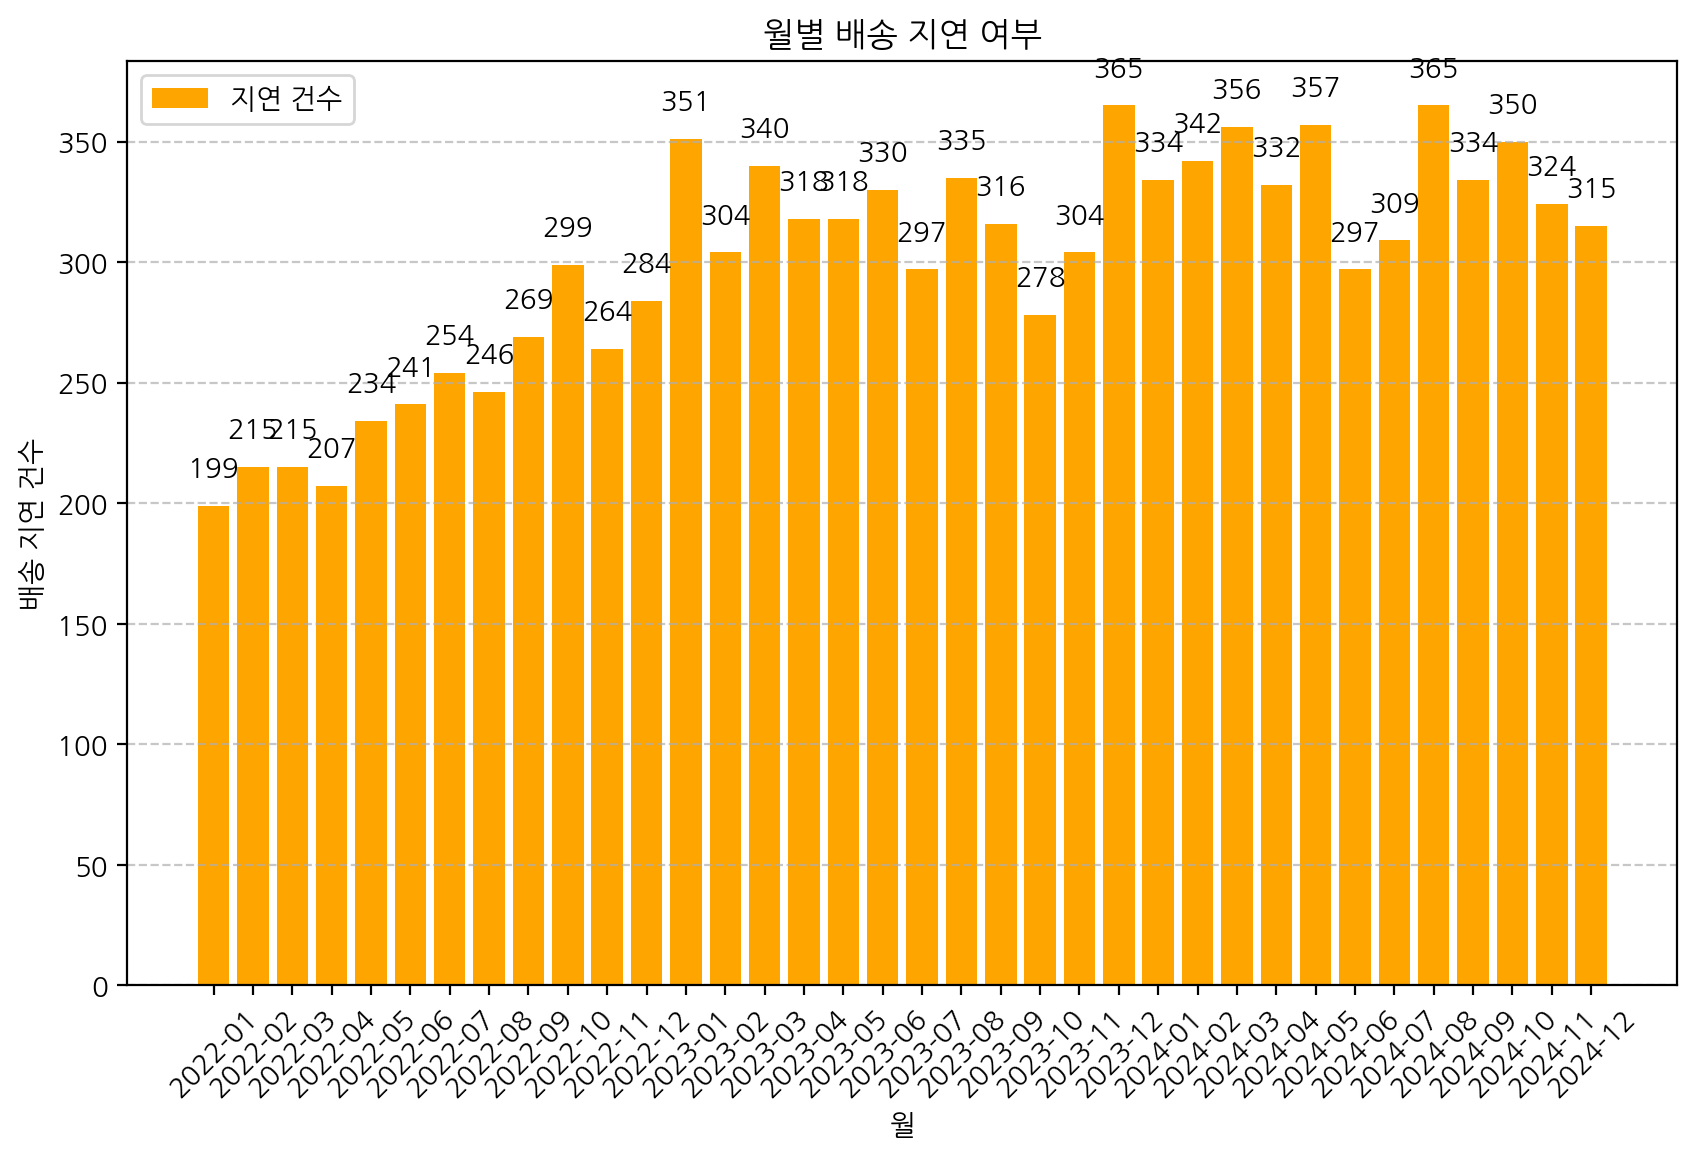

OnTime
0    160881
1     10798
Name: count, dtype: int64


In [5]:
def check_delivery(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour

    # 조건 1: 21시 이전 주문
    if order_hour < 21:
        # 다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

    # 조건 2: 21시 이후 주문
    else:
        # 다다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        return 0 if delivery <= deadline else 1

# 적용
df_unique["OnTime"] = df_unique.apply(lambda df_unique: check_delivery(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)
#df_unique["OnTime"] = df_unique.groupby("")
df_unique['YearMonth'] = df_unique['OrderDT'].dt.to_period('M')
monthly_delay = df_unique.groupby('YearMonth')['OnTime'].sum()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(monthly_delay.index.astype(str), monthly_delay, color='orange', label='지연 건수')
plt.title("월별 배송 지연 여부")
plt.xlabel("월")
plt.ylabel("배송 지연 건수")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# 각 막대 위에 값 표시
for i, v in enumerate(monthly_delay):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.show()
print(df_unique["OnTime"].value_counts())

def check_delivery2(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour
    # 당일 밤 9시 이후인데
    if order_hour >= 21:
        # 다음날 아침 7시df["OrderDT"] = pd.to_datetime(df["OrderDT"])

# 날짜를 이용해 'Year-Month' 컬럼 생성
df_unique['YearMonth'] = df_uniquef['OrderDT'].dt.to_period('M')

# 월별 주문 횟수 계산
monthly_counts = df['YearMonth'].value_counts().sort_index()

# 시계열 데이터프레임으로 변환
monthly_df = pd.DataFrame(monthly_counts).reset_index()
monthly_df.columns = ['YearMonth', 'OrderCount']

# 시계열 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(monthly_df['YearMonth'].astype(str), monthly_df['OrderCount'], marker='o', linestyle='-', color='blue')
plt.title("월별 주문 횟수 (2022-2024)")
plt.xlabel("월")
plt.ylabel("주문 횟수")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 월별 주문 횟수 출력
print(monthly_df)까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

# 적용
df_unique["OnTime2"] = df_unique.apply(lambda df_unique: check_delivery2(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)

print(df_unique["OnTime2"].value_counts())


def check_delivery3(order, delivery):
    # 주문 시간 분리
    order_day = order.day
    delivery_day = delivery.day

    delta = (delivery_day - order_day).dt.days
    #seconds = delta.total_day()

    return delta

#df["OnTime3"] = df.apply(lambda df: check_delivery3(df["OrderDT"], df["DeliveryDT"]), axis=1)

#print(df["OnTime3"].value_counts())

df_unique["OnTime3"] = (df_unique["DeliveryDT_date"] - df_unique["OrderDT_date"]).dt.days
cc = df_unique["OnTime3"].value_counts().sort_index()

plt.bar(x = cc.index, height=cc.values)
plt.show()

Month
5     15217
10    14751
3     14713
8     14703
7     14701
1     14538
6     14181
11    14069
12    14016
4     13978
9     13763
2     13049
Name: count, dtype: int64
📊 월별 배송 지연 여부
OnTime4      0    1
Month              
1        13654  884
2        12188  861
3        13802  911
4        13121  857
5        14308  909
6        13313  868
7        13841  860
8        13757  946
9        12844  919
10       13824  927
11       13177  892
12       13052  964


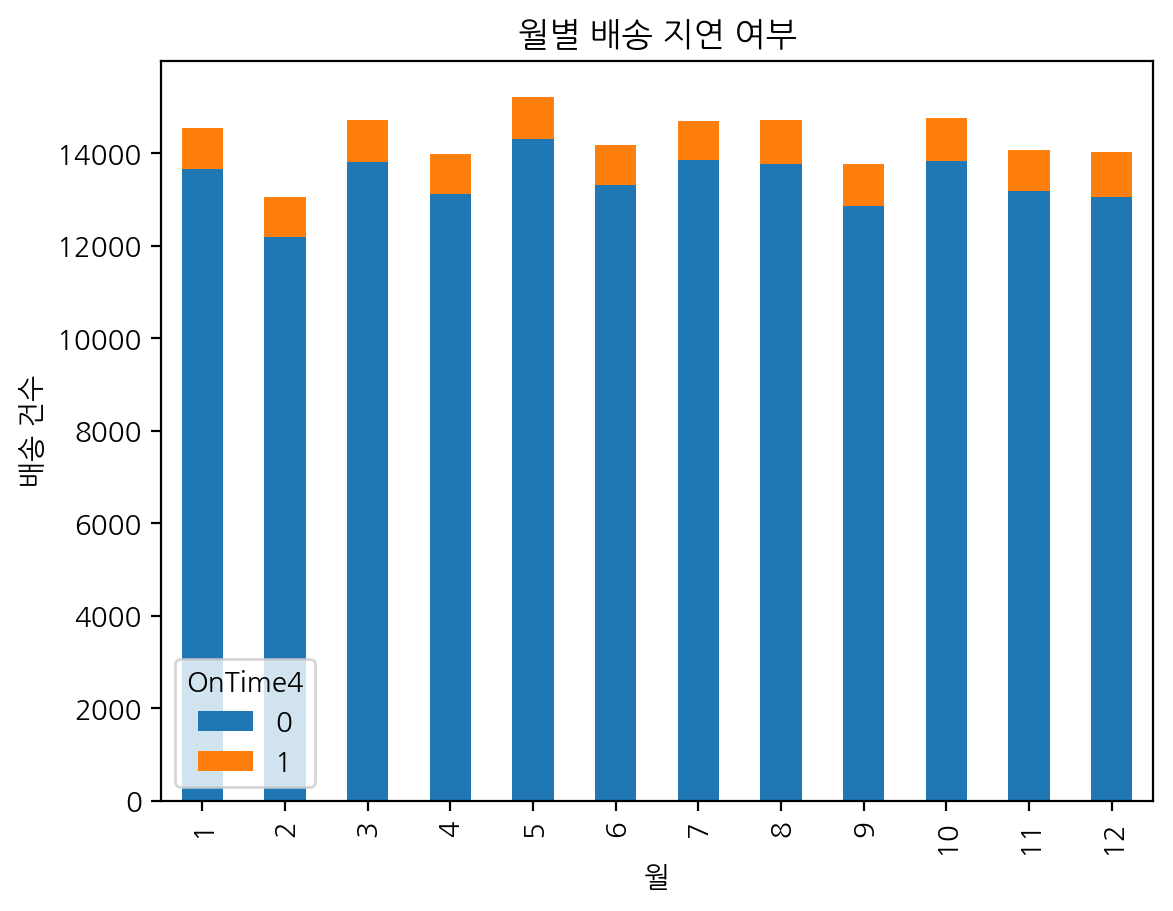

In [6]:
def check_delivery4(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour

    # 조건 1: 21시 이전 주문
    if order_hour < 21:
        # 다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

    # 조건 2: 21시 이후 주문
    else:
        # 다다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        return 0 if delivery <= deadline else 1

# 22+23+24 1월 합산


# 적용
df_unique["OnTime4"] = df_unique.apply(lambda df_unique: check_delivery4(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)

df_unique["Month"] = df_unique["OrderDT"].dt.month
print(df_unique["Month"].value_counts())
#monthly_delay = df.groupby("Month")["OnTime4"].value_counts().unstack(fill_value=0)
#df["Month_date"] = df.groupby("Month")["OnTime4"].value_counts()

#print(monthly_delay.value_counts())

monthly_delay = df_unique.groupby("Month")["OnTime4"].value_counts().unstack(fill_value=0)

# 결과 확인
print("📊 월별 배송 지연 여부")
print(monthly_delay)

# 그래프 그리기
monthly_delay.plot(kind="bar", stacked=True, title="월별 배송 지연 여부")
plt.xlabel("월")
plt.ylabel("배송 건수")
plt.show()


Year
2024    62550
2023    57491
2022    51638
Name: count, dtype: int64
📊 매년 배송 지연 여부
OnTime5      0     1
Year                
2022     48711  2927
2023     53635  3856
2024     58535  4015


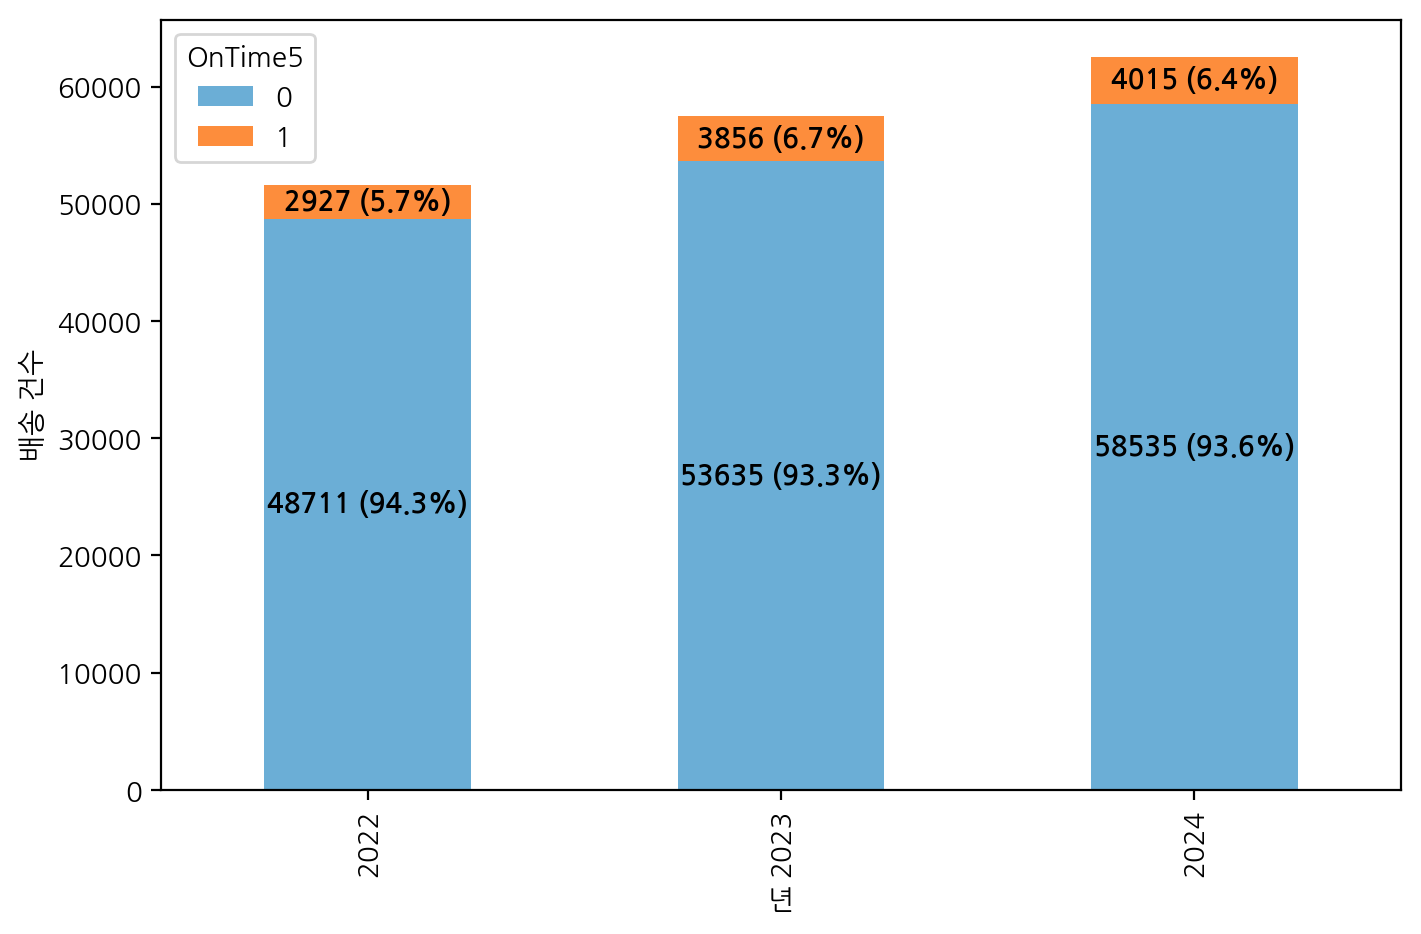

In [7]:
def check_delivery5(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour

    # 조건 1: 21시 이전 주문
    if order_hour < 21:
        # 다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

    # 조건 2: 21시 이후 주문
    else:
        # 다다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        return 0 if delivery <= deadline else 1


# 적용
df_unique["OnTime5"] = df_unique.apply(lambda df_unique: check_delivery5(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)

df_unique["Year"] = df_unique["OrderDT"].dt.year
print(df_unique["Year"].value_counts())

year_delay = df_unique.groupby("Year")["OnTime5"].value_counts().unstack(fill_value=0)

# 결과 확인
print("📊 매년 배송 지연 여부")
print(year_delay)

yearly_delay_ratio = year_delay.div(year_delay.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(8, 5))
year_delay.plot(kind="bar", stacked=True, ax=ax, color=["#6baed6", "#fd8d3c"])

# 숫자와 비율 표시
for i, (index, row) in enumerate(year_delay.iterrows()):
    total = row.sum()
    for j, value in enumerate(row):
        percentage = value / total * 100
        ax.text(i, row[:j+1].sum() - value/2, f"{value} ({percentage:.1f}%)",
                ha="center", va="center", color="black", fontsize=10, fontweight="bold")

# 그래프 그리기
#year_delay.plot(kind="bar", stacked=True, title="매년 배송 지연 여부")
plt.xlabel("년")
plt.ylabel("배송 건수")
plt.show()


0     2022-01
4     2022-01
8     2022-01
12    2022-01
19    2022-02
Name: YearMonth, dtype: period[M]
   YearMonth  OrderCount  DelayCount
0    2022-01        4171         199
1    2022-02        3888         215
2    2022-03        4565         215
3    2022-04        4284         207
4    2022-05        4847         234
5    2022-06        4449         241
6    2022-07        4505         254
7    2022-08        4451         246
8    2022-09        4074         269
9    2022-10        4265         299
10   2022-11        4160         264
11   2022-12        3979         284
12   2023-01        4949         351
13   2023-02        4273         304
14   2023-03        4936         340
15   2023-04        4537         318
16   2023-05        4910         318
17   2023-06        4619         330
18   2023-07        4803         297
19   2023-08        5034         335
20   2023-09        4508         316
21   2023-10        5027         278
22   2023-11        4908         304
23   202

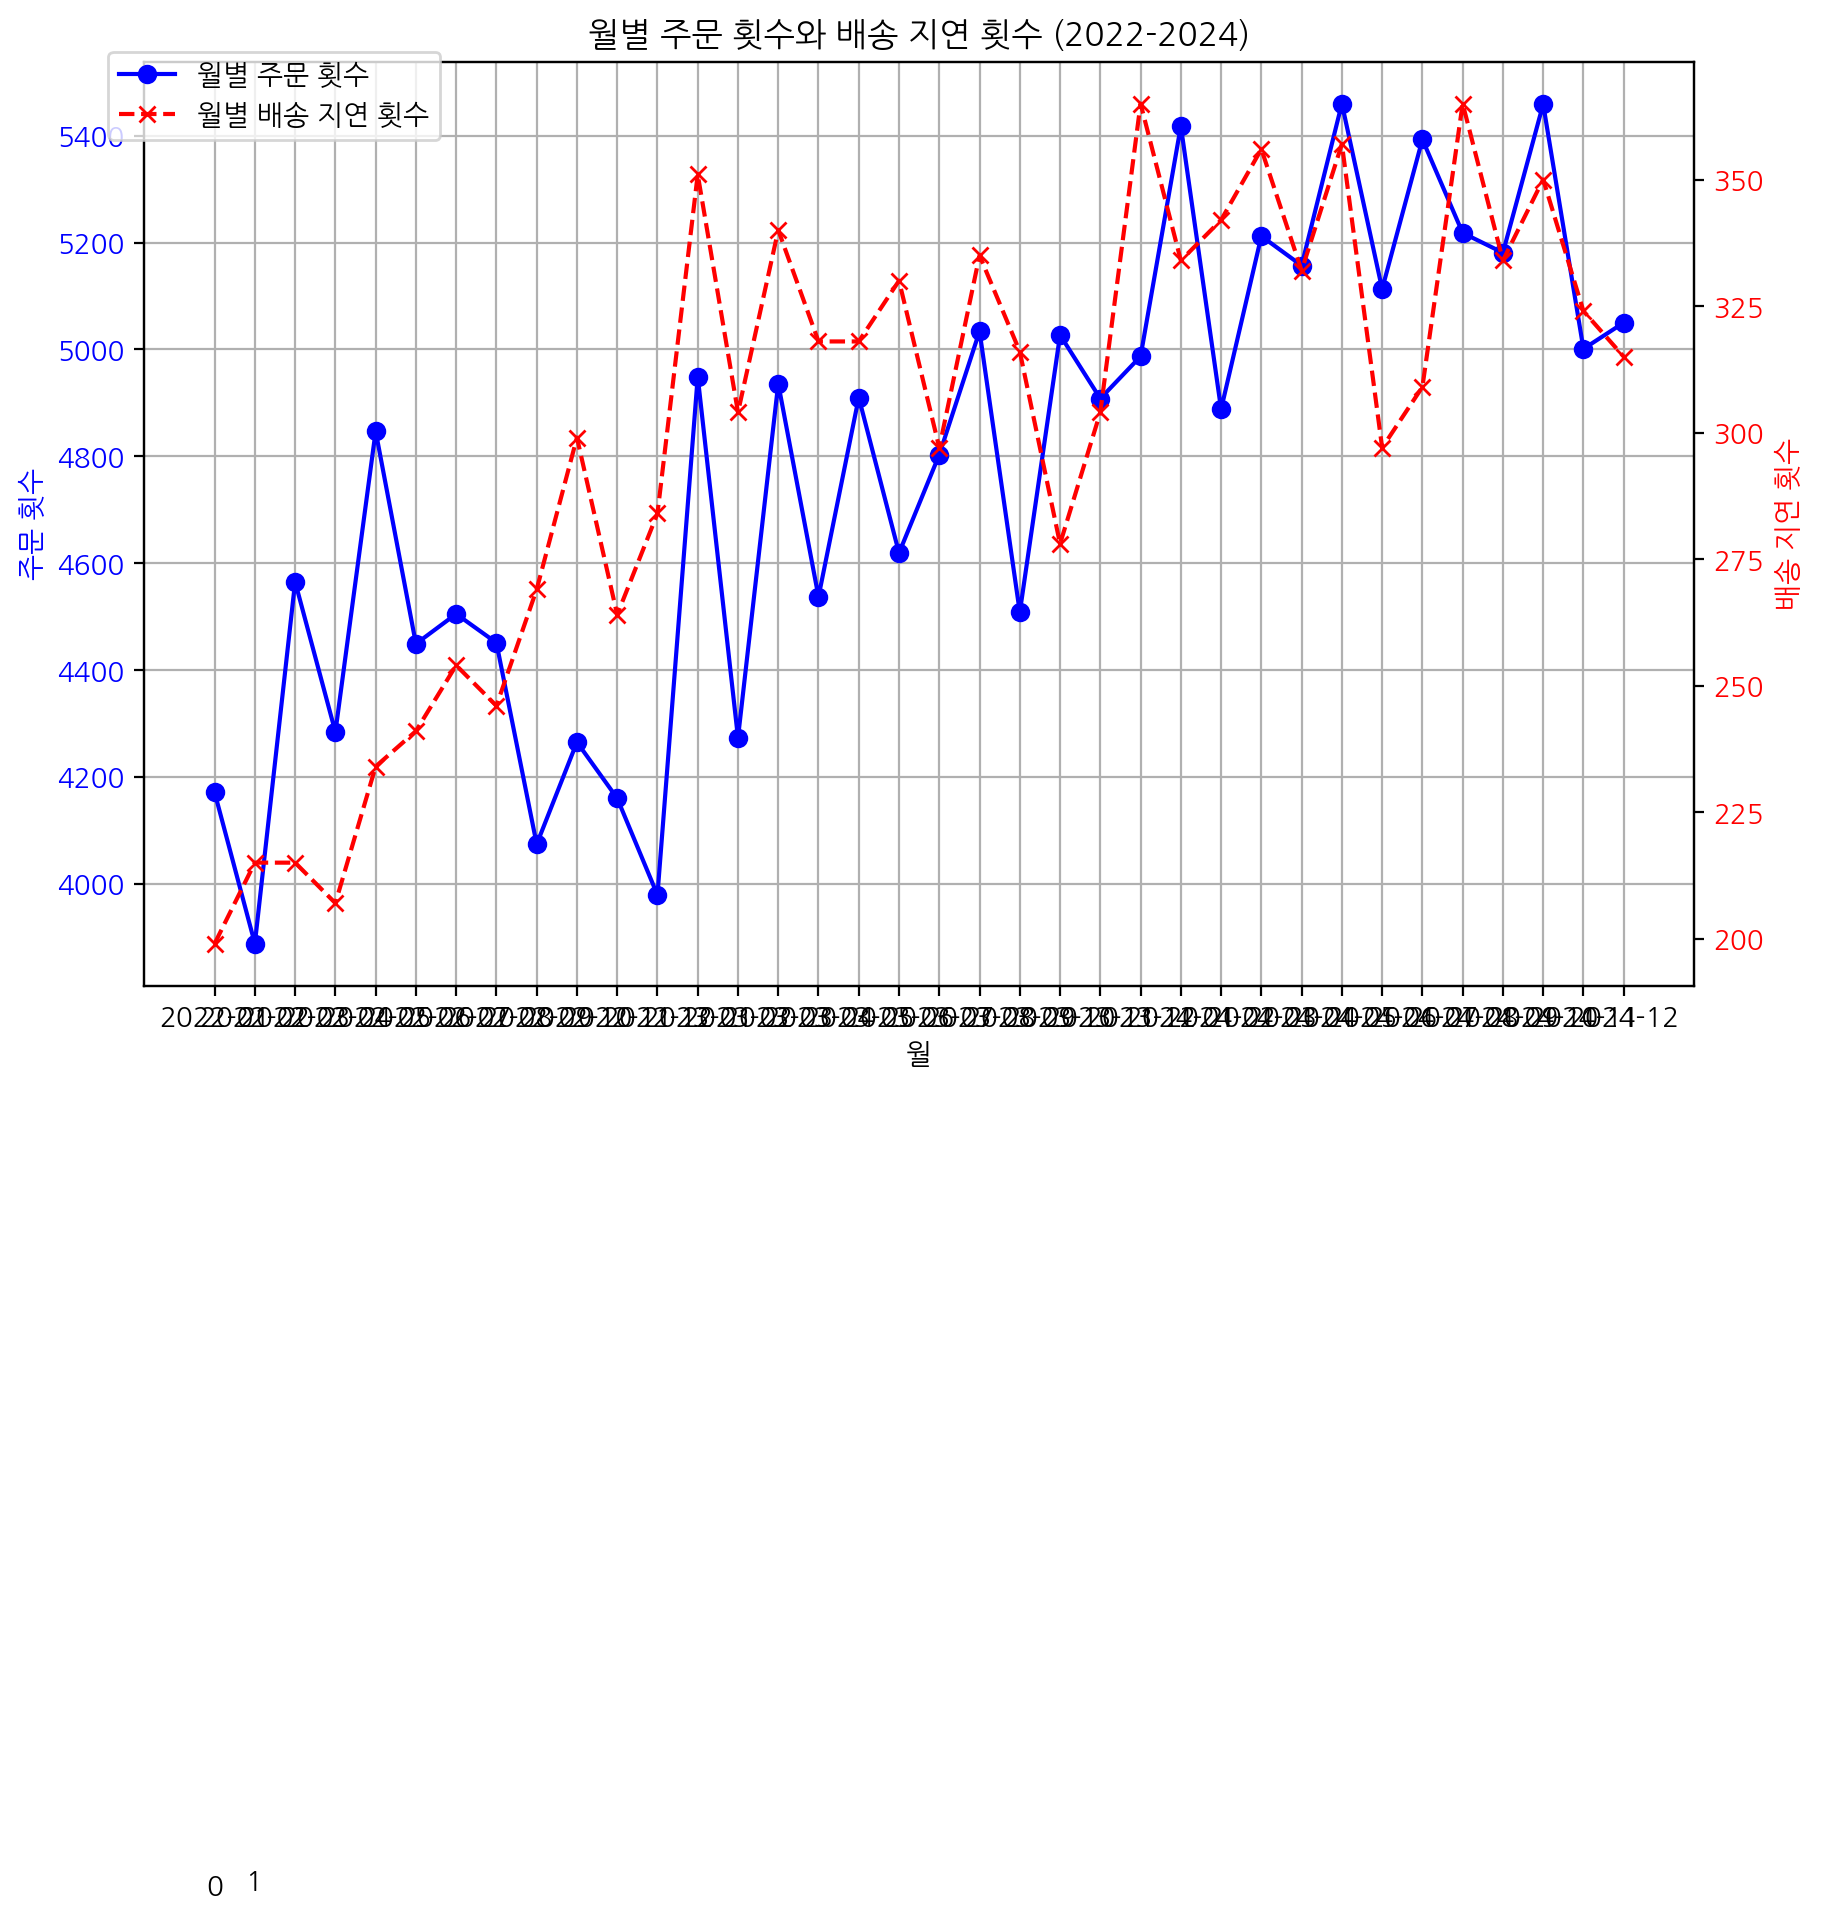

In [8]:
'''
print(df_unique.columns)

#df_unique["Year"] = df_unique["OrderDT"].dt.year
#print(df_unique["Year"].value_counts())

#df_dates = pd.DataFrame(df_unique, columns=["OrderDT_date"])
print(df_unique["OrderDT"].dt.month)
#df_dates["Year"] = df_dates.dt.year
#df_dates["Month"] = df_dates.dt.month

# 월별 날짜 데이터 확인
#print(df_dates)

# 시계열 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(data=df_unique["OrderDT"], width= df_unique["OrderDT"].dt.month, marker="o", linestyle="-", color="blue")
plt.title("월별 날짜 시계열 (3년)")
plt.xlabel("날짜")
plt.ylabel("월")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
'''

df_unique["OrderDT_date1"] = pd.to_datetime(df_unique["OrderDT"])

# 날짜를 이용해 'Year-Month' 컬럼 생성
df_unique['YearMonth'] = df_unique['OrderDT_date1'].dt.to_period('M')

print(df_unique["YearMonth"].head())

# 월별 주문 횟수 계산
monthly_counts = df_unique['YearMonth'].value_counts().sort_index()

monthly_delay_counts = df_unique[df_unique["OnTime5"] == 1]['YearMonth'].value_counts().sort_index()

# 시계열 데이터프레임으로 변환
monthly_df = pd.DataFrame({'OrderCount': monthly_counts, 'DelayCount': monthly_delay_counts}).fillna(0).reset_index()
monthly_df.columns = ['YearMonth', 'OrderCount', 'DelayCount']

fig, ax1 = plt.subplots(figsize=(10, 6))
# 시계열 그래프 그리기

ax1.plot(monthly_df['YearMonth'].astype(str), monthly_df['OrderCount'], marker='o', color='blue', label='월별 주문 횟수')
ax1.set_xlabel('월')
ax1.set_ylabel('주문 횟수', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("월별 주문 횟수와 배송 지연 횟수 (2022-2024)")
ax1.grid(True)

# 두 번째 Y축: 월별 배송 지연 횟수
ax2 = ax1.twinx()
ax2.plot(monthly_df['YearMonth'].astype(str), monthly_df['DelayCount'], marker='x', color='red', linestyle='--', label='월별 배송 지연 횟수')
ax2.set_ylabel('배송 지연 횟수', color='red')
ax2.tick_params(axis='y', labelcolor='red')
for i, v in enumerate(monthly_delay):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10, color='black')

# 범례 추가
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.xticks(rotation=45)

# 월별 주문 횟수 출력
print(monthly_df)
print(monthly_df["OrderCount"].sum())

  YearMonth  OrderCount  DelayCount
0   2022-01        4171         199
1   2022-02        3888         215
2   2022-03        4565         215
3   2022-04        4284         207
4   2022-05        4847         234
월별 주문 횟수와 배송 지연 횟수 간 상관 계수: 0.70


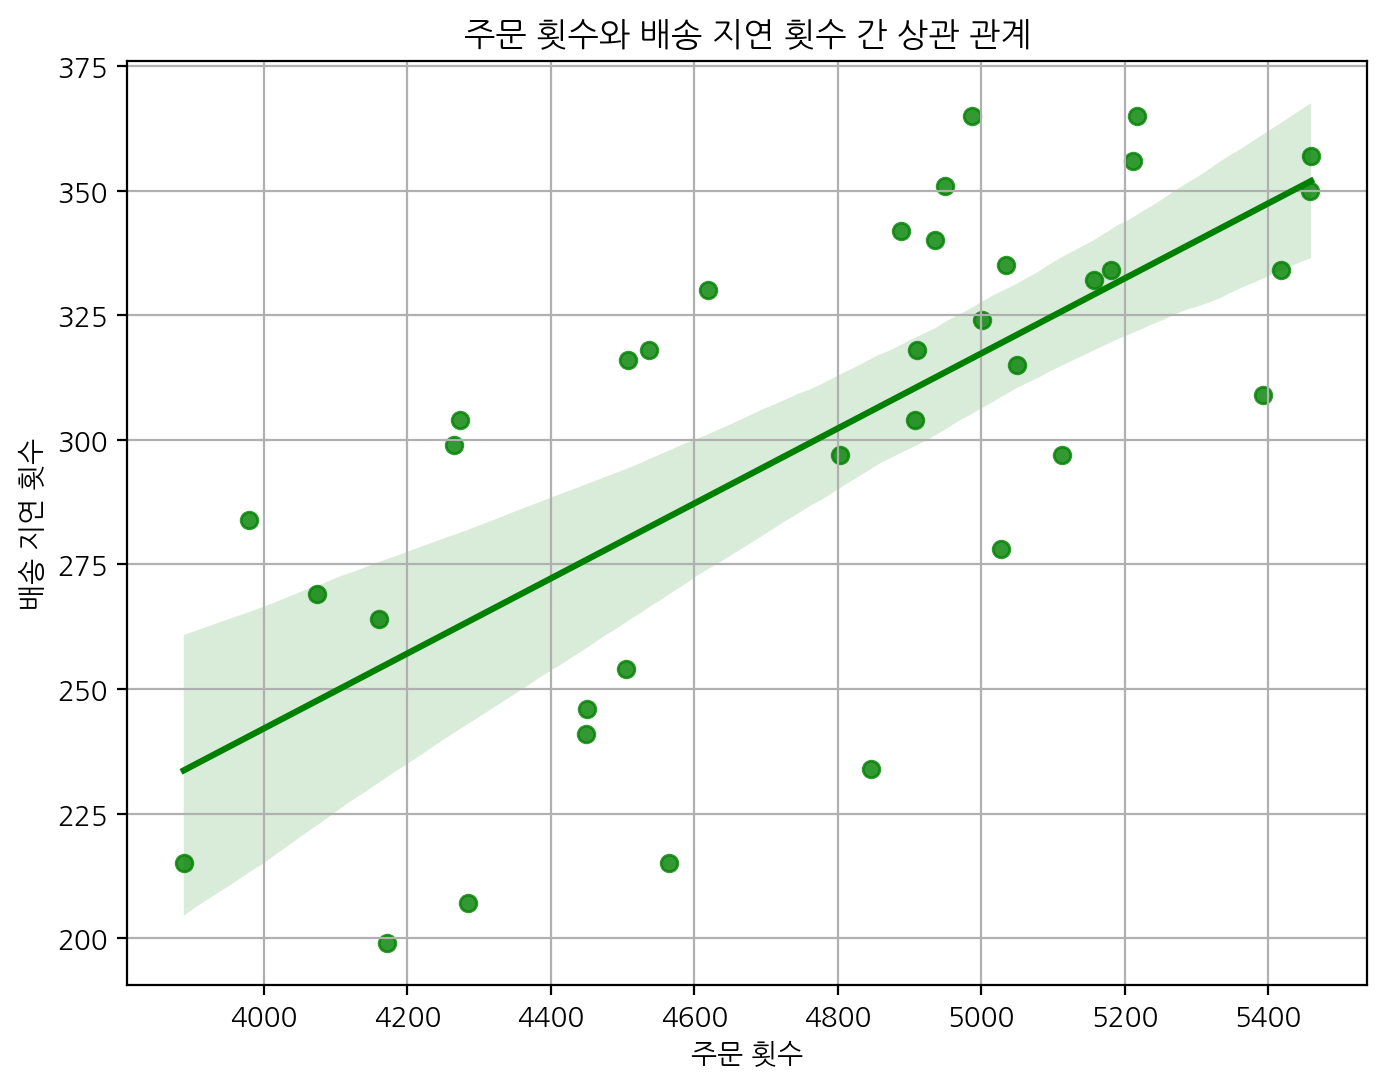

In [9]:
monthly_dff = pd.DataFrame({'OrderCount': monthly_counts, 'DelayCount': monthly_delay_counts}).fillna(0).reset_index()
monthly_dff.columns = ['YearMonth', 'OrderCount', 'DelayCount']

print(monthly_dff.head())

correlation = monthly_dff[['OrderCount', 'DelayCount']].corr().iloc[0, 1]
print(f"월별 주문 횟수와 배송 지연 횟수 간 상관 계수: {correlation:.2f}")

plt.figure(figsize=(8, 6))
sns.regplot(x=monthly_dff['OrderCount'], y=monthly_dff['DelayCount'], marker='o', color="green")
plt.title("주문 횟수와 배송 지연 횟수 간 상관 관계")
plt.xlabel("주문 횟수")
plt.ylabel("배송 지연 횟수")
plt.grid(True)
plt.show()

0     2022-01
4     2022-01
8     2022-01
12    2022-01
19    2022-02
Name: YearMonth, dtype: period[M]
  YearMonth  OrderCount  DelayCount
0   2022-01        4171         199
1   2022-02        3888         215
2   2022-03        4565         215
3   2022-04        4284         207
4   2022-05        4847         234
월별 주문 횟수와 배송 지연 횟수 간 상관 계수: -0.17
월별 주문 횟수와 배송 지연 횟수 간 상관 계수: 0.24
월별 주문 횟수와 배송 지연 횟수 간 상관 계수: 0.27


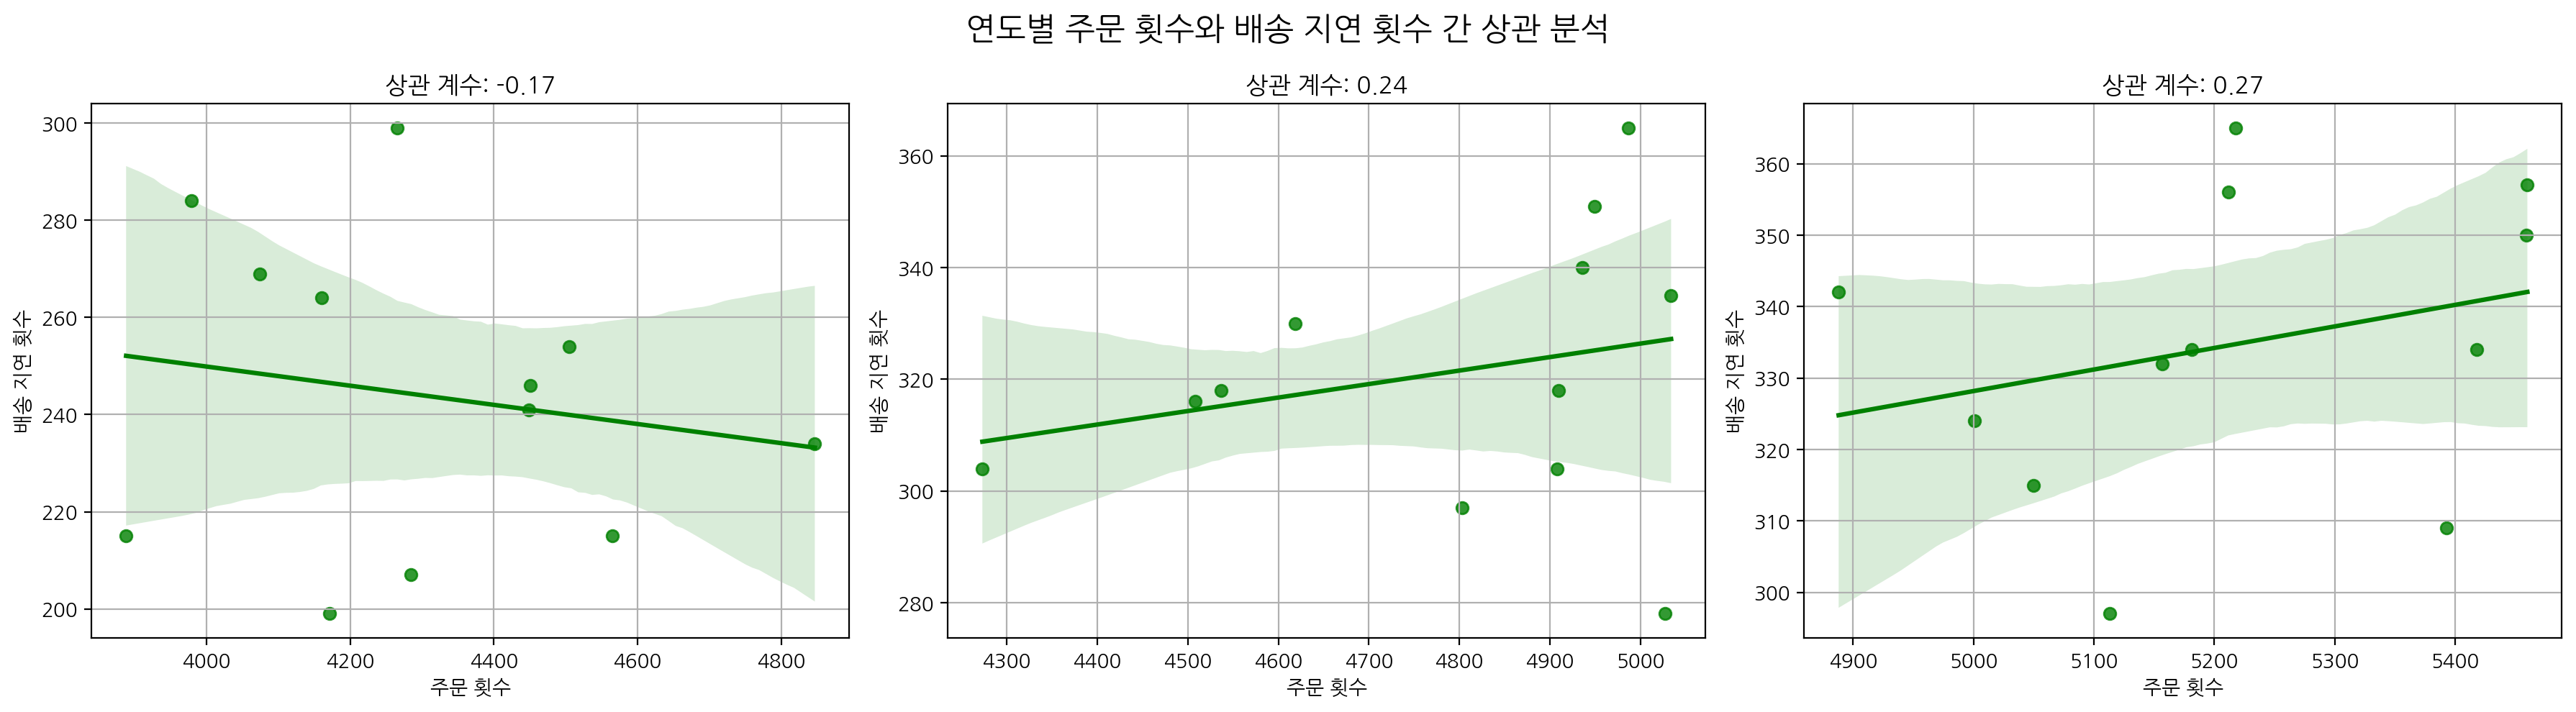

In [10]:
df_unique["OrderDT_date1"] = pd.to_datetime(df_unique["OrderDT"])

# 날짜를 이용해 'Year-Month' 컬럼 생성
df_unique['YearMonth'] = df_unique['OrderDT_date1'].dt.to_period('M')

print(df_unique["YearMonth"].head())

# 월별 주문 횟수 계산
monthly_counts = df_unique['YearMonth'].value_counts().sort_index()

monthly_delay_counts = df_unique[df_unique["OnTime5"] == 1]['YearMonth'].value_counts().sort_index()

monthly_dff = pd.DataFrame({'OrderCount': monthly_counts, 'DelayCount': monthly_delay_counts}).fillna(0).reset_index()
monthly_dff.columns = ['YearMonth', 'OrderCount', 'DelayCount']

print(monthly_dff.head())

monthly_dfff = []
correlation = []
monthly_dfff.append(monthly_dff[monthly_dff['YearMonth'].dt.year == 2022])
correlation.append(monthly_dfff[0][['OrderCount', 'DelayCount']].corr().iloc[0, 1])
print(f"월별 주문 횟수와 배송 지연 횟수 간 상관 계수: {correlation[0]:.2f}")
monthly_dfff.append(monthly_dff[monthly_dff['YearMonth'].dt.year == 2023])
correlation.append(monthly_dfff[1][['OrderCount', 'DelayCount']].corr().iloc[0, 1])
print(f"월별 주문 횟수와 배송 지연 횟수 간 상관 계수: {correlation[1]:.2f}")
monthly_dfff.append(monthly_dff[monthly_dff['YearMonth'].dt.year == 2024])
correlation.append(monthly_dfff[2][['OrderCount', 'DelayCount']].corr().iloc[0, 1])
print(f"월별 주문 횟수와 배송 지연 횟수 간 상관 계수: {correlation[2]:.2f}")


'''
plt.figure(figsize=(8, 6))
sns.regplot(x=monthly_dff_2022['OrderCount'], y=monthly_dff_2022['DelayCount'], marker='o', color="green")
plt.title("주문 횟수와 배송 지연 횟수 간 상관 관계")
plt.xlabel("주문 횟수")
plt.ylabel("배송 지연 횟수")
plt.grid(True)
plt.show()
'''

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle("연도별 주문 횟수와 배송 지연 횟수 간 상관 분석", fontsize=16)

for i in range(3):
    ax = axes[i]
    sns.regplot(x=monthly_dfff[i]["OrderCount"], y=monthly_dfff[i]["DelayCount"], marker='o', color="green", ax=ax)
    ax.set_title(f"상관 계수: {correlation[i]:.2f}")
    ax.set_xlabel("주문 횟수")
    ax.set_ylabel("배송 지연 횟수")
    ax.grid(True)

plt.tight_layout()
plt.show()

In [11]:
monthly_counts = df_unique.groupby(['Year', 'YearMonth']).size().unstack(fill_value=0)

print(monthly_counts.head())
#monthly_delay_counts = df_unique[df_unique["OnTime5"] == 1]['YearMonth'].value_counts().sort_index()
monthly_delay_counts = df_unique.loc[df_unique["OnTime5"] == 1].groupby(['Year', 'YearMonth']).size().unstack(fill_value=0)


YearMonth  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  2022-07  \
Year                                                                       
2022          4171     3888     4565     4284     4847     4449     4505   
2023             0        0        0        0        0        0        0   
2024             0        0        0        0        0        0        0   

YearMonth  2022-08  2022-09  2022-10  ...  2024-03  2024-04  2024-05  2024-06  \
Year                                  ...                                       
2022          4451     4074     4265  ...        0        0        0        0   
2023             0        0        0  ...        0        0        0        0   
2024             0        0        0  ...     5212     5157     5460     5113   

YearMonth  2024-07  2024-08  2024-09  2024-10  2024-11  2024-12  
Year                                                             
2022             0        0        0        0        0        0  
2023           

YearMonth  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  2022-07  \
Year                                                                       
2022          4171     3888     4565     4284     4847     4449     4505   
2023             0        0        0        0        0        0        0   
2024             0        0        0        0        0        0        0   

YearMonth  2022-08  2022-09  2022-10  ...  2024-03  2024-04  2024-05  2024-06  \
Year                                  ...                                       
2022          4451     4074     4265  ...        0        0        0        0   
2023             0        0        0  ...        0        0        0        0   
2024             0        0        0  ...     5212     5157     5460     5113   

YearMonth  2024-07  2024-08  2024-09  2024-10  2024-11  2024-12  
Year                                                             
2022             0        0        0        0        0        0  
2023           

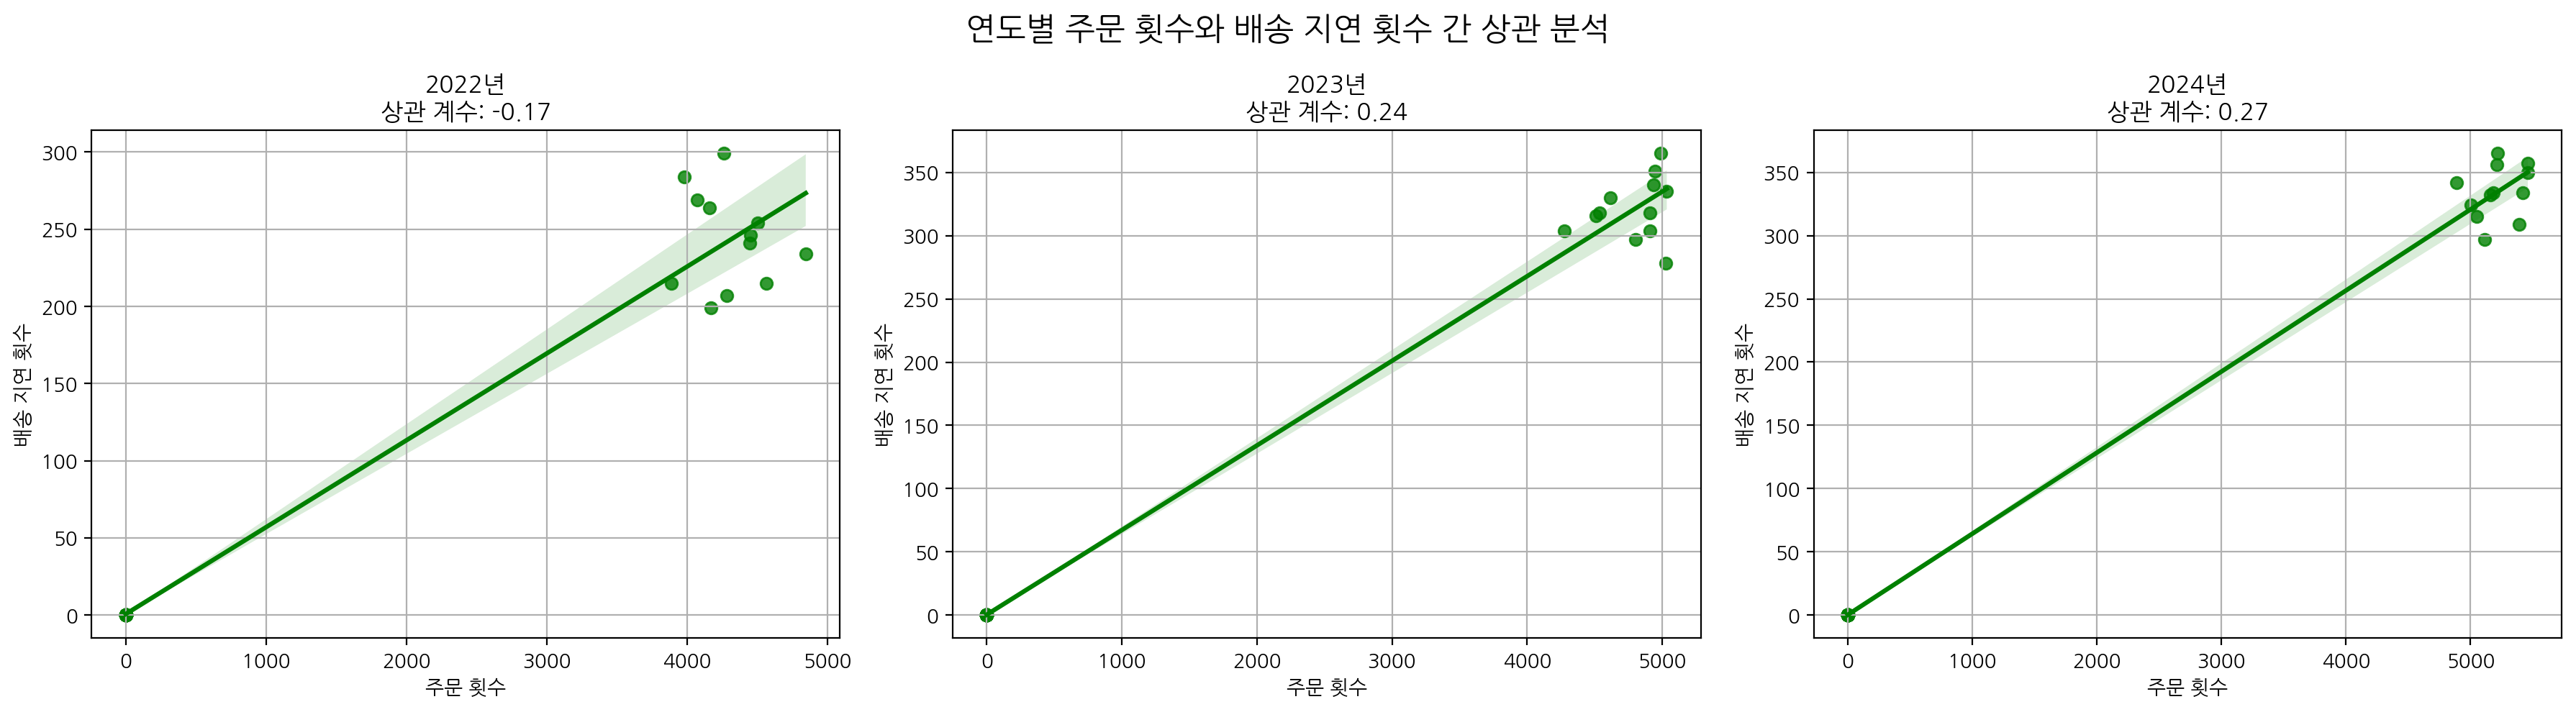

In [12]:

# 연도별 월별 주문 횟수 계산
monthly_counts = df_unique['YearMonth'].value_counts().sort_index()

monthly_counts = df_unique.groupby(['Year', 'YearMonth']).size().unstack(fill_value=0)

print(monthly_counts.head())
#monthly_delay_counts = df_unique[df_unique["OnTime5"] == 1]['YearMonth'].value_counts().sort_index()
monthly_delay_counts = df_unique.loc[df_unique["OnTime5"] == 1].groupby(['Year', 'YearMonth']).size().unstack(fill_value=0)

#monthly_delay_counts = monthly_delay_counts.groupby(['Year', 'YearMonth']).size().unstack(fill_value=0)
print(monthly_delay_counts.head())
print(monthly_counts.index)
#years = sorted(set(monthly_counts.index.year))

correlations = {}
for year in monthly_counts.index:
    # 해당 연도에 해당하는 연월 목록 필터링
    #year_months = [ym for ym in monthly_counts.index if ym.year == year]
    print(year)
    #print(df_unique['YearMonth'].year == [year])
    order_count = monthly_counts.loc[year]
    #(order_count)
    delay_count = monthly_delay_counts.loc[year]
    valid_index = order_count[order_count > 0].index

    order_count = order_count.loc[valid_index]
    delay_count = delay_count.loc[valid_index]

    #print(order_count)
    #print( delay_count)

    correlation = order_count.corr(delay_count)
    correlations[year] = correlation
    print(f"{year}년 월별 주문 횟수와 배송 지연 횟수 간 상관 계수: {correlation:.2f}")

# Step 3: Subplots 시각화
fig, axes = plt.subplots(nrows=1, ncols=len(monthly_counts.index), figsize=(18, 5))
fig.suptitle("연도별 주문 횟수와 배송 지연 횟수 간 상관 분석", fontsize=16)

for i, year in enumerate(monthly_counts.index):
    ax = axes[i]
    sns.regplot(x=monthly_counts.loc[year], y=monthly_delay_counts.loc[year], marker='o', color="green", ax=ax)
    ax.set_title(f"{year}년\n상관 계수: {correlations[year]:.2f}")
    ax.set_xlabel("주문 횟수")
    ax.set_ylabel("배송 지연 횟수")
    ax.grid(True)

plt.tight_layout()
plt.show()